<a href="https://colab.research.google.com/github/ALL-Rodrigues/Topicos_Avancados/blob/main/Notebooks/Aula13_23_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decima terceira aula de topicos avançados

### rede bayesiana

1. não anotado
2. arestas (relações)
- direcionada (a para b)
- significa a influencia diretamente


exemplo: fumante (S) -> cancer de pilmar (C) -> tosse (T) <br>
                  C  -> raio-x anormal (R) <br>

formulas que não peguei <br>
<br>

redes bayesiana: <br>

- diagnostico medico
- sistemas de recomendações
- detecção de spam
- reconhecimento de tela
- classificação de texto

## vantagens e Limiatações
vantagens: <br>
- rapido e eficiente
- funciona bem com textos
- poucos dados para treinar

limitações: <br>
- supõe independencia total



Acurácia:  1.0


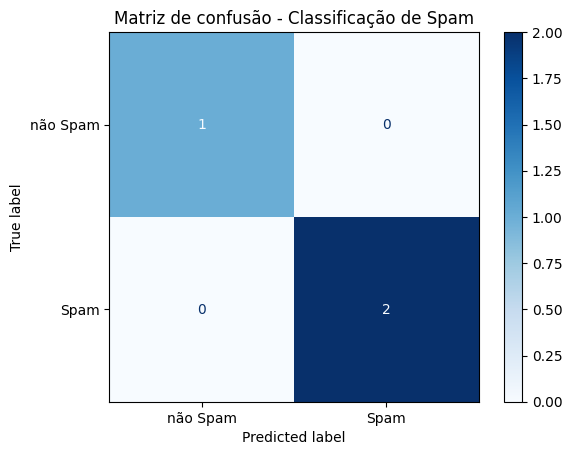

In [ ]:
# código 01

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

#no exemplo fornecido, foram ...
#1 - criando um conjunto de dados fictício
data = {
    'quantidade_palavras_maiusculas': [3, 7, 2, 8, 1, 6, 0, 5, 1, 4],
    'conta_link': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    'é_spam': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
#2 - separando as variaveis
X = df[['quantidade_palavras_maiusculas', 'conta_link']]
y = df['é_spam']

#3 - dividindo os dados em trino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#4 - criando e trreinando o classificador
modelo = GaussianNB()
modelo.fit(X_train, y_train)

#5 - fazendo previsoes
y_pred = modelo.predict(X_test)

#6 - avaliando modelo
print("Acurácia: ", accuracy_score(y_test, y_pred))

#7 - matriz de confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["não Spam", "Spam"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusão - Classificação de Spam")
plt.show()


#principal component analysis

### objetivos <br>
- reduzir o numero de variaveis
- identificar padrãoes nos dados
- preservar a maior vaeiabilidade possivel
- facilitar a maior visualização e analises

### como pca funciona: <br>
- 1 padroniza dados
- 2 calcula matriz de covariancia
- 3 calcula autovalores

### visualização com pca: <br>
-
-
-

### o que é pca? <br>
- PCA = principal component analysis (analise de componentes principais)
- tecnica não supervisionada para redução de dimensionaidade
trasnformar dados correlacionados em novas variaveis não correlacionadas (componentes principais)
- usado em:
  1. compressão de imagens.
  2. detecção de anomalias.
  3. visualização de dados multidimensionais

### por que reduzir dimensoes?<br>
problemas com muitas variaveis:<br>
- custo computacional alto.
- overfitting em modelos de ML.
- dificuldade de visualização
<br>

Solução: PCA mantém a maior parte da informação ...

como pca funciona?<br>

1. centraliza os dados (subtrai a média)
2. calcula a matriz de covariancia (mede como variais se relacionaom)
3. encontra autovetores e autovalores (direção de maxima variança)
4. seleciona

### Exemplo prático (dataaset de hardware)<br>
dados:
- CPU usage(%)
- memory usage (%)
- network latency (%)
-

continuação não anotada.
(espaço para a anotação perdida)


que as variáveis possue  pesos, no caso se uma tiver importancia ele multiplica o valor.

pegar dos slides dele depois os negocios que tam faltando (bastante coisa faltando mesmo ok)

não lembra mas falta coisa antes e depois o negocio todos.

Primeiros linhas do dataset:
         CPU     memory       disk    Network
0  74.967142  82.883716  55.366810  25.855025
1  68.617357  80.237602  58.411768  27.199095
2  76.476885  90.058690  66.245769  33.736468
3  85.230299  98.264972  65.807031  33.051851
4  67.658466  80.383731  29.334959  29.895492

Variancia explicada por cada componente: 
[0.50700648 0.2499721 ]


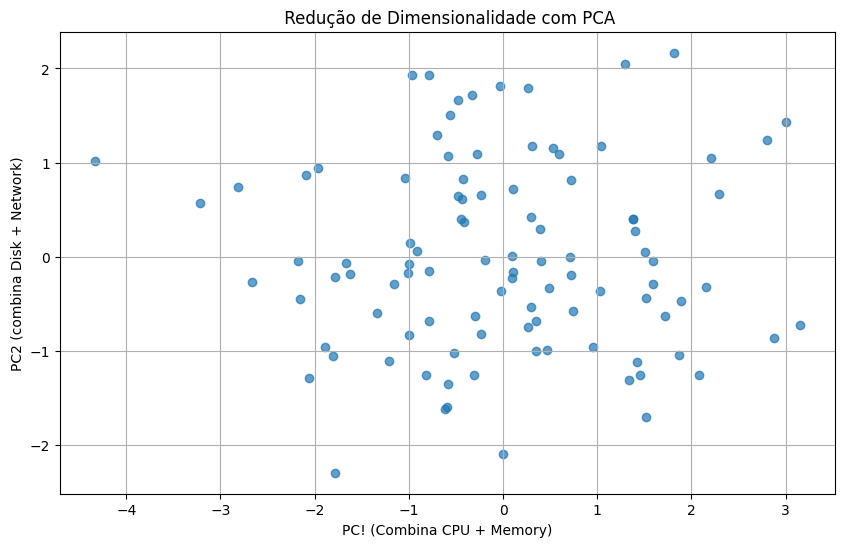


Autovetores (pesosos das variaveis em cada componente)
[[ 0.67039503  0.66791985  0.23420006 -0.22271936]
 [ 0.00876075 -0.00924771  0.68974671  0.72393867]]


In [ ]:
#código 02
# passo 1 - instalara e importar biblioteca
# !pip install numpy pandas matplotlib scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# passo 2 - criar dados artificiais
np.random.seed(42)
n_samples = 100
cpu = np.random.normal(70, 10, n_samples) # media = 70% desvio 10
memory = cpu * 1.2 + np.random.normal(0, 5, n_samples) # correlacionado com CPU
disk = np.random.normal(50, 15, n_samples) # Independente
network = np.random.normal(30, 5, n_samples) # independente

# criar dataframe
data = pd.DataFrame({
    'CPU': cpu,
    'memory': memory,
    'disk': disk,
    'Network': network
})
print("Primeiros linhas do dataset:")
print(data.head())

#passo 3: padronizar os dados (media=0, desvio=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#passo 4: aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

#criar DataFrame com os componentes
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])


# passo 5: resultados
print("\nVariancia explicada por cada componente: ")
print(pca.explained_variance_ratio_)

#passo 6: visualização
plt.figure(figsize=(10,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('PC! (Combina CPU + Memory)')
plt.ylabel('PC2 (combina Disk + Network)')
plt.title(' Redução de Dimensionalidade com PCA')
plt.grid()
plt.show()

#passo 7: autovetores (passos das variaveis originais)
print("\nAutovetores (pesosos das variaveis em cada componente)")
print(pca.components_)